# Data Exploration
### Examine the dataset

In [1]:
# loading the dataset
import pandas as pd
from sklearn import datasets # from statistics.api import datasets

num_cols = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris = datasets.load_iris()
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns=num_cols)
iris['Species'] = species
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# exploring each case of our label: species
iris['count'] = 1
iris[['Species','count']].groupby(['Species']).count()

,count
Species,
setosa,50
versicolor,50
virginica,50


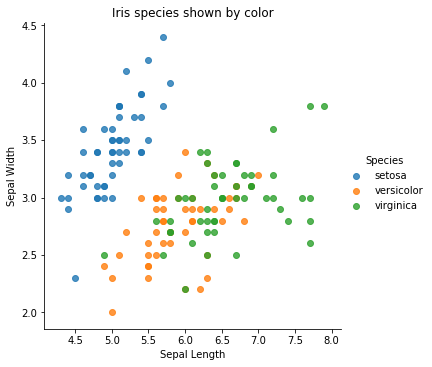

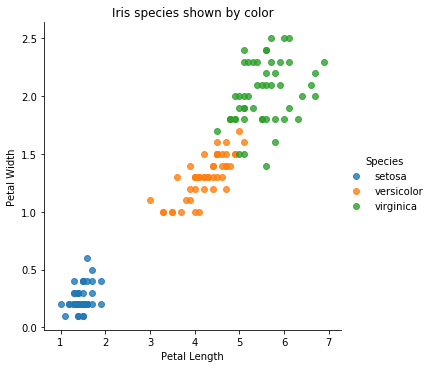

In [3]:
# data visualization and seaborn package
%matplotlib inline

def plot_iris(iris, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x=col1, y=col2, data=iris, hue='Species', fit_reg=False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by color')
    plt.show()
plot_iris(iris, 'Sepal Length', 'Sepal Width')
plot_iris(iris, 'Petal Length', 'Petal Width')

# Data Preparation
#### Prepare the Dataset

In [4]:
# scaling the dataset to kinda normalize features
from sklearn.preprocessing import scale

iris_scaled = scale(iris[num_cols])
iris_scaled = pd.DataFrame(iris_scaled, columns=num_cols)
iris_scaled.round(3).describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,-0.000053,-0.000007,0.000040,0.000173
std,1.003436,1.003372,1.003323,1.003263
min,-1.870000,-2.434000,-1.568000,-1.447000
25%,-0.901000,-0.592000,-1.227000,-1.184000
50%,-0.053000,-0.132000,0.336500,0.133000
75%,0.675000,0.559000,0.763000,0.791000
max,2.492000,3.091000,1.786000,1.712000


In [5]:
# replacing number for each specie category
level = {'setosa':0, 'versicolor': 1, 'virginica': 2}
iris_scaled['Species'] = [level[x] for x in iris['Species']]
iris_scaled

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [6]:
# splitting the data into training and test set by Bernoulli sampling
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3456)
# splitting half the data in training and other half in test set so that we can predict the accuracy of our predicted and 
# original data
test_size = int(len(iris_scaled)/2)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size = test_size )
# data for training
iris_train_features = iris_split[0][:,:4]
iris_train_labels = np.ravel(iris_split[0][:,4])#np.ravel function return the contagious flattened array(1-D array)
# data for testing
iris_test_features = iris_split[1][:,:4]
iris_test_labels = np.ravel(iris_split[1][:,4])
print(iris_train_features.shape)
print(iris_test_labels.shape)

(75, 4)
(75,)


# Modelling and Model Evaluation
### Train and evaluate the KNN(K-Nearest Neighbor) Model
After exploring and preparing the data, now  we will train and evaluate a K=n model where K is n(1,2,3....)

Model is trained using the fit method with trained features and labels numpy arrays as its arguments

In [7]:
# define and train the KNN Model
from sklearn.neighbors import KNeighborsClassifier

KNN_mod = KNeighborsClassifier(n_neighbors=3)# e.g. setting number of neighbors to 3
# KNN_mod.fit(featuresToBeTrained, levelsToBeTrained)
KNN_mod.fit(iris_train_features, iris_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Model Evaluation
##### Evaluate/Test above model using accuracy statistics and a set of plots.

Steps for model evaluation(predictions and computing accuracy) are:
1. The predict method is used to compute KNN predictions from model with test features as an argument.
2. Predictions are scored/saved as correct or incorrect using a list comprehension.
3. Accuracy is computed as percentage of the test cases correctly classified/labelled.

In [8]:
# creating df of test features array
iris_test = pd.DataFrame(iris_test_features, columns=num_cols)
# adding predicted result column to this iris test df
iris_test['predicted'] = KNN_mod.predict(iris_test_features)
# comparing predicted with original
iris_test['correct']=[1 if predicted == original else 0 for predicted,original in zip(iris_test['predicted'], iris_test_labels)] 
accuracy = 100.0 * float(sum(iris_test['correct']))/float(len(iris_test))
print(accuracy)

96.0


The accuracy is pretty good.

### Plots of Classification of Iris Species

IndexError: invalid index to scalar variable.

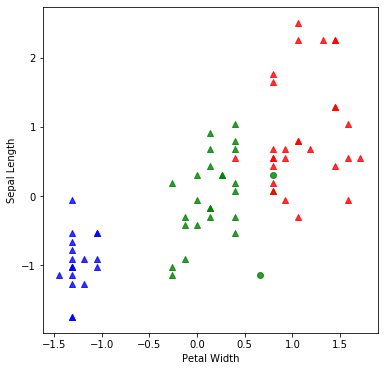

In [9]:
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictionary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['Species'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species by color')
    return 'Done'
plot_shapes(iris_test, 'Petal Width', 'Sepal Length', markers, colors)
plot_shapes(iris_test, 'Sepal Width', 'Sepal Length', markers, colors)